In [ ]:
# Importing the required libraries and dataset
import os
import itertools
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Hide all TensorFlow debugging logs

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import densenet
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
import keras.backend as K
from keras.constraints import max_norm
from PIL import Image

In [ ]:
# Importing the required libraries and dataset
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

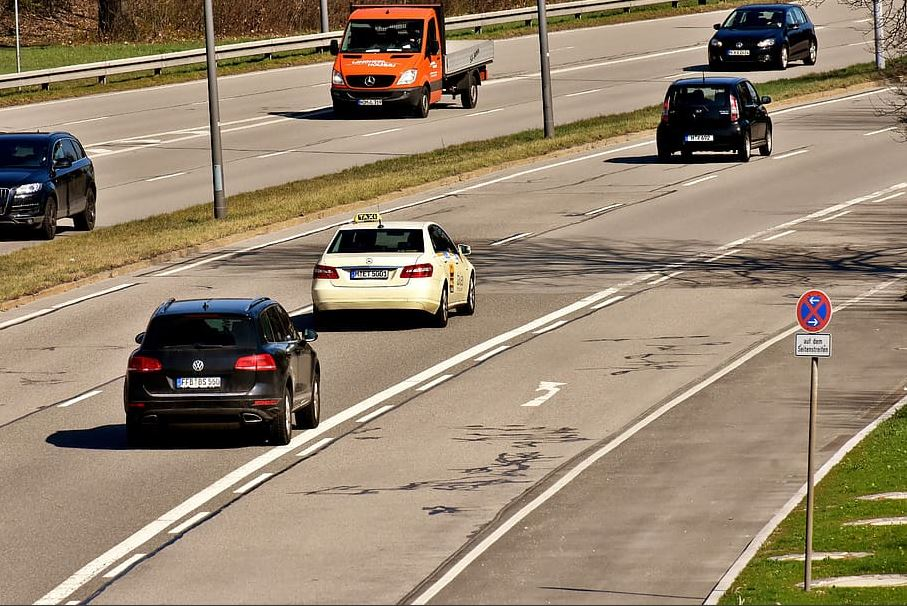

In [ ]:
fname = 'trial.jpg'
img = cv2.imread(fname, cv2.IMREAD_COLOR)
cv2_imshow(img)

name = 'trial.jpg'
img2 = cv2.imread(fname, cv2.IMREAD_COLOR)

NOW LOAD THE MODEL

In [ ]:
final_model = keras.models.load_model("Updated_Cifar10_CNN_model.h5")

OSError: ignored

607
910


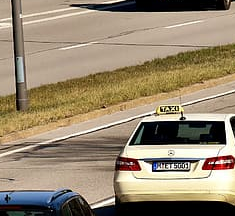

True

In [ ]:
padding = 10
scale = 3
stride = 20

height, width= img.shape[:2]
print(height)
print(width)
slicedImage = img[110:(200+int(380/3)), 200:(210+int(676/3))]
cv2_imshow(slicedImage)
cv2.imwrite('temp.jpg', slicedImage)

In [ ]:
print(np.round(width/stride-(width/scale)/stride))

30.0


In [ ]:
print(np.round(height/stride-(height/scale)/stride))

20.0


In [ ]:
def load_image(filename):
  imag = load_img(filename, target_size=(32,32))
  imag = img_to_array(imag)
  imag = imag.reshape(1, 32, 32, 3)
  imag = imag.astype('float32')
  return imag

In [ ]:
def predict():
  slicedimag = load_image('temp.jpg')
  classes = [0,1,2,3,4,5,6,7,8,9]
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  d = dict(zip(classes, class_names))
  predictions = np.argmax(final_model.predict(slicedimag), axis=-1)[0]  
  predictedclass = d[predictions]
  # print("Predicted class:" + str(d[predictions]))
  return predictedclass, final_model.predict(slicedimag)

  #print("Predicted class:" + str(d[predictions]))
  #print(final_model.predict(slicedimag))

In [ ]:
predict()

('truck', array([[0.20680824, 0.17078727, 0.03876477, 0.18110484, 0.02514166,
         0.03322914, 0.03927812, 0.06466812, 0.1357063 , 0.9940121 ]],
       dtype=float32))

In [ ]:
for i in range(0, int(np.round(width/stride-(width/scale)/stride))):
  for j in range(0, int(np.round(height/stride-(height/scale)/stride))):
      slicedImage = img[(i*stride):(i*stride+int(width/scale)), (j*stride):(j*stride+int(height/scale))]
      cv2.imwrite('temp.jpg', slicedImage)
      predictedclass, arrayy = predict()
      # print(predictedclass)
      boxes = []
      if(predictedclass=='automobile'):
        # img2 = cv2.rectangle(img2, ((i*stride), (j*stride)), ((i*stride+int(width/scale)), (j*stride+int(height/scale))), (255,255,255), 3)
        box_array = [i*stride, j*stride, i*stride+int(width/scale), j*stride+int(height/scale)]
        boxes = np.append(boxes,box_array, axis= 0)
        continue
        # print(arrayy)
        #print(i)
        #print(j)

In [ ]:
def NMS(boxes, overlapThresh = 0.4):
    # Return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner
    # Compute the area of the bounding boxes and sort the bounding
    # Boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # We add 1, because the pixel at the start as well as at the end counts
    # The indices of all boxes at start. We will redundant indices one by one.
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        # Create temporary indices  
        temp_indices = indices[indices!=i]
        # Find out the coordinates of the intersection box
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        # Find out the width and the height of the intersection box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]
        # if the actual boungding box has an overlap bigger than treshold with any other box, remove it's index  
        if np.any(overlap) > overlapThresh:
            indices = indices[indices != i]
    #return only the boxes at the remaining indices
    return boxes[indices].astype(int)

In [ ]:
def draw_bounding_boxes(image,boxes):
    for box in boxes:
        image = cv2.rectangle(image,box[:2], box[2:], (255,255,255), 3)
        #cv2_imshow(image)
    return image

In [ ]:
boxees = NMS(boxes, overlapThresh = 0.4)
draw_bounding_boxes(img2,boxees)

array([[[ 21,  41,  59],
        [ 16,  36,  54],
        [ 31,  50,  71],
        ...,
        [101, 123, 135],
        [  0,   8,  24],
        [ 89, 112, 128]],

       [[ 32,  52,  70],
        [ 16,  36,  54],
        [ 34,  53,  74],
        ...,
        [ 34,  56,  68],
        [  0,  16,  33],
        [ 84, 107, 123]],

       [[ 39,  59,  77],
        [ 31,  51,  69],
        [ 27,  47,  65],
        ...,
        [  0,   4,  16],
        [ 54,  74,  91],
        [183, 203, 220]],

       ...,

       [[136, 155, 176],
        [137, 156, 177],
        [134, 153, 174],
        ...,
        [ 28, 116, 102],
        [ 26, 113,  99],
        [ 50, 137, 123]],

       [[125, 144, 165],
        [132, 151, 172],
        [133, 152, 173],
        ...,
        [ 24, 111,  97],
        [  3,  90,  76],
        [ 33, 120, 106]],

       [[121, 140, 161],
        [135, 154, 175],
        [136, 155, 176],
        ...,
        [ 12,  97,  82],
        [  0,  65,  50],
        [ 20, 105,  90]]

In [ ]:
cv2_imshow(p)

AttributeError: ignored

In [ ]:
# slicedimag = load_image('car.jpg')
# result = final_model.predict(slicedimag)
# print(result)
# prediction = result[0]
# np.array(prediction)
# index = np.argmax(prediction)
# print(index)

In [ ]:
grayimg = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
cv2_imshow(grayimg)

In [ ]:
print(img.shape)

img2 = cv2.rectangle(img, (10, 10), (int(676/5), int(380/5)), (255,255,255), 3)
cv2_imshow(img2)

In [ ]:
ROI= np.array([[(10,10),(10,100),(200,100),(200,10)]], dtype= np.int32)

blank= np.zeros_like(grayimg)

region_of_interest= cv2.fillPoly(blank, ROI,255)

region_of_interest_image= cv2.bitwise_and(grayimg, region_of_interest)

cv2_imshow(region_of_interest_image)